In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

In [2]:
w=16

In [3]:
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [4]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475321, 16, 16)
strides:  (2048, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x24d24a73040
byteorder:  little
byteswap:  False
type: float64


In [5]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")

In [6]:
np.info(labels)

class:  ndarray
shape:  (475321,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x24d5eaed040
byteorder:  little
byteswap:  False
type: float64


In [7]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [8]:
training_sample_labels

380256

In [9]:
training_sample

380256

In [10]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [11]:
train_X.shape

(380256, 16, 15)

In [12]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
#print(train_X)

In [14]:
train_y.shape

(380256,)

In [15]:
#print(test_y)

In [16]:
train_y=train_y.reshape(train_y.shape[0],1)

In [17]:
test_y=test_y.reshape(test_y.shape[0],1)

In [18]:
#print(train_X)

In [19]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380256, 16, 15) (380256, 1) (95065, 16, 15) (95065, 1)


In [20]:
model_gru =  keras.models.Sequential([
    keras.layers.GRU(128,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2])),#,activation='relu'),
    keras.layers.GRU(units=64,return_sequences=True),#,activation='relu'),
    keras.layers.GRU(units=32),#,activation='relu'),
    keras.layers.Dense(units=50,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])
model_gru.compile(loss='MeanSquaredError', optimizer='sgd',metrics=['accuracy'])

In [21]:
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 16, 128)           55680     
                                                                 
 gru_1 (GRU)                 (None, 16, 64)            37248     
                                                                 
 gru_2 (GRU)                 (None, 32)                9408      
                                                                 
 dense (Dense)               (None, 50)                1650      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 104,037
Trainable params: 104,037
Non-trainable params: 0
_________________________________________________________________


In [22]:
 start = t.time()

In [23]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=250,validation_data=(test_X, test_y), batch_size=128)#, shuffle=False)

Epoch 1/250
2971/2971 [==============================] - 64s 17ms/step - loss: 0.1940 - accuracy: 0.7353 - val_loss: 0.1858 - val_accuracy: 0.7531
Epoch 2/250
2971/2971 [==============================] - 48s 16ms/step - loss: 0.1917 - accuracy: 0.7393 - val_loss: 0.1848 - val_accuracy: 0.7531
Epoch 3/250
2971/2971 [==============================] - 48s 16ms/step - loss: 0.1897 - accuracy: 0.7393 - val_loss: 0.1823 - val_accuracy: 0.7531
Epoch 4/250
2971/2971 [==============================] - 48s 16ms/step - loss: 0.1851 - accuracy: 0.7393 - val_loss: 0.1769 - val_accuracy: 0.7531
Epoch 5/250
2971/2971 [==============================] - 48s 16ms/step - loss: 0.1789 - accuracy: 0.7405 - val_loss: 0.1710 - val_accuracy: 0.7534
Epoch 6/250
2971/2971 [==============================] - 48s 16ms/step - loss: 0.1743 - accuracy: 0.7419 - val_loss: 0.1670 - val_accuracy: 0.7543
Epoch 7/250
2971/2971 [==============================] - 48s 16ms/step - loss: 0.1711 - accuracy: 0.7403 - val_loss: 0

2971/2971 [==============================] - 48s 16ms/step - loss: 0.1554 - accuracy: 0.7581 - val_loss: 0.1529 - val_accuracy: 0.7631
Epoch 57/250
2971/2971 [==============================] - 48s 16ms/step - loss: 0.1552 - accuracy: 0.7586 - val_loss: 0.1521 - val_accuracy: 0.7624
Epoch 58/250
2971/2971 [==============================] - 48s 16ms/step - loss: 0.1551 - accuracy: 0.7584 - val_loss: 0.1517 - val_accuracy: 0.7640
Epoch 59/250
2971/2971 [==============================] - 48s 16ms/step - loss: 0.1550 - accuracy: 0.7587 - val_loss: 0.1530 - val_accuracy: 0.7617
Epoch 60/250
2971/2971 [==============================] - 48s 16ms/step - loss: 0.1549 - accuracy: 0.7589 - val_loss: 0.1531 - val_accuracy: 0.7613
Epoch 61/250
2971/2971 [==============================] - 48s 16ms/step - loss: 0.1547 - accuracy: 0.7591 - val_loss: 0.1530 - val_accuracy: 0.7630
Epoch 62/250
2971/2971 [==============================] - 48s 16ms/step - loss: 0.1546 - accuracy: 0.7594 - val_loss: 0.1517 

2971/2971 [==============================] - 48s 16ms/step - loss: 0.1497 - accuracy: 0.7703 - val_loss: 0.1479 - val_accuracy: 0.7746
Epoch 112/250
2971/2971 [==============================] - 48s 16ms/step - loss: 0.1496 - accuracy: 0.7704 - val_loss: 0.1474 - val_accuracy: 0.7737
Epoch 113/250
2971/2971 [==============================] - 48s 16ms/step - loss: 0.1495 - accuracy: 0.7704 - val_loss: 0.1477 - val_accuracy: 0.7738
Epoch 114/250
2971/2971 [==============================] - 48s 16ms/step - loss: 0.1494 - accuracy: 0.7708 - val_loss: 0.1496 - val_accuracy: 0.7712
Epoch 115/250
2971/2971 [==============================] - 48s 16ms/step - loss: 0.1494 - accuracy: 0.7708 - val_loss: 0.1481 - val_accuracy: 0.7734
Epoch 116/250
2971/2971 [==============================] - 48s 16ms/step - loss: 0.1493 - accuracy: 0.7712 - val_loss: 0.1474 - val_accuracy: 0.7743
Epoch 117/250
2971/2971 [==============================] - 48s 16ms/step - loss: 0.1492 - accuracy: 0.7711 - val_loss: 0

2971/2971 [==============================] - 47s 16ms/step - loss: 0.1459 - accuracy: 0.7771 - val_loss: 0.1446 - val_accuracy: 0.7797
Epoch 167/250
2971/2971 [==============================] - 47s 16ms/step - loss: 0.1458 - accuracy: 0.7777 - val_loss: 0.1481 - val_accuracy: 0.7750
Epoch 168/250
2971/2971 [==============================] - 47s 16ms/step - loss: 0.1458 - accuracy: 0.7774 - val_loss: 0.1442 - val_accuracy: 0.7798
Epoch 169/250
2971/2971 [==============================] - 47s 16ms/step - loss: 0.1458 - accuracy: 0.7776 - val_loss: 0.1443 - val_accuracy: 0.7795
Epoch 170/250
2971/2971 [==============================] - 47s 16ms/step - loss: 0.1457 - accuracy: 0.7776 - val_loss: 0.1439 - val_accuracy: 0.7800
Epoch 171/250
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1457 - accuracy: 0.7780 - val_loss: 0.1436 - val_accuracy: 0.7809
Epoch 172/250
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1456 - accuracy: 0.7777 - val_loss: 0

2971/2971 [==============================] - 47s 16ms/step - loss: 0.1442 - accuracy: 0.7804 - val_loss: 0.1436 - val_accuracy: 0.7805
Epoch 222/250
2971/2971 [==============================] - 47s 16ms/step - loss: 0.1442 - accuracy: 0.7800 - val_loss: 0.1428 - val_accuracy: 0.7824
Epoch 223/250
2971/2971 [==============================] - 47s 16ms/step - loss: 0.1442 - accuracy: 0.7802 - val_loss: 0.1435 - val_accuracy: 0.7807
Epoch 224/250
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1442 - accuracy: 0.7803 - val_loss: 0.1429 - val_accuracy: 0.7824
Epoch 225/250
2971/2971 [==============================] - 47s 16ms/step - loss: 0.1441 - accuracy: 0.7800 - val_loss: 0.1434 - val_accuracy: 0.7818
Epoch 226/250
2971/2971 [==============================] - 47s 16ms/step - loss: 0.1441 - accuracy: 0.7805 - val_loss: 0.1435 - val_accuracy: 0.7814
Epoch 227/250
2971/2971 [==============================] - 47s 16ms/step - loss: 0.1441 - accuracy: 0.7804 - val_loss: 0

In [24]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 16s 5ms/step


In [25]:
stop=t.time()-start
print(stop)

11840.86690735817


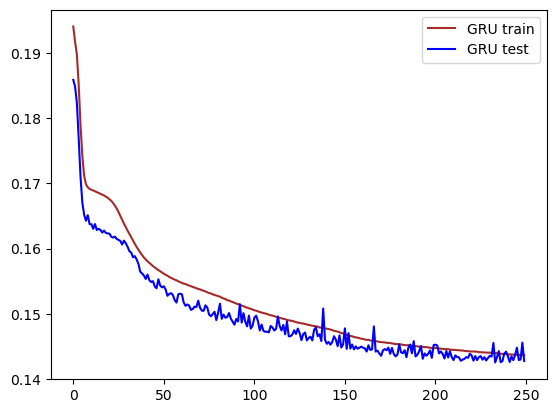

In [26]:
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

In [27]:
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [28]:
np.shape(pred_y)

(95065, 1)

In [29]:
pred_y

array([[0.00264313],
       [0.00344938],
       [0.00304964],
       ...,
       [0.07522465],
       [0.07449856],
       [0.07554988]], dtype=float32)

In [30]:
pred_y=np.reshape(pred_y,95065)

0.14276518916467476
0.23229700769511752
0.3778428101270087
0.2875993795118045


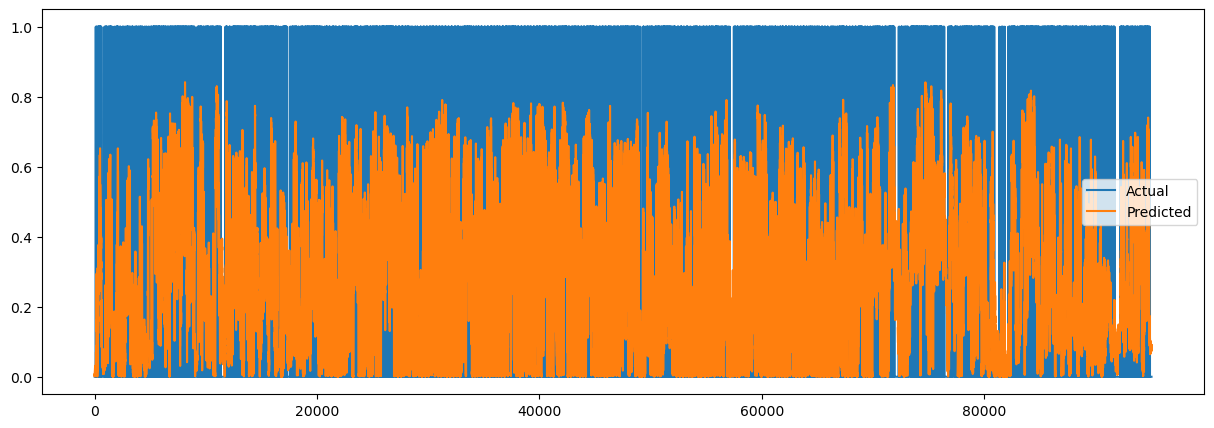

In [31]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)


plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [32]:
np.shape(train_X)

(380256, 16, 15)

In [33]:
np.shape(train_y)

(380256, 1)

In [34]:
np.shape(test_X)

(95065, 16, 15)

In [35]:
np.shape(test_y)

(95065, 1)

14854/14854 [==============================] - 74s 5ms/step


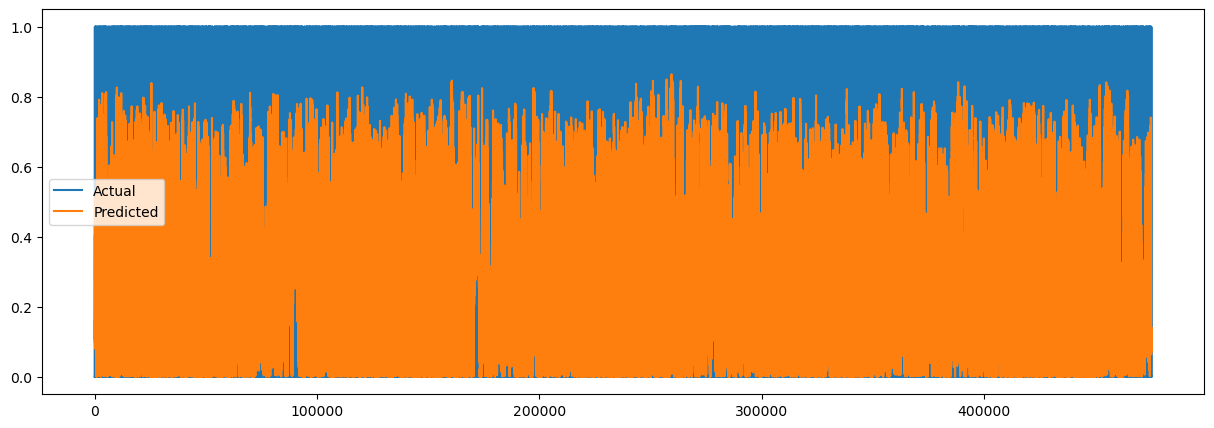

In [36]:
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

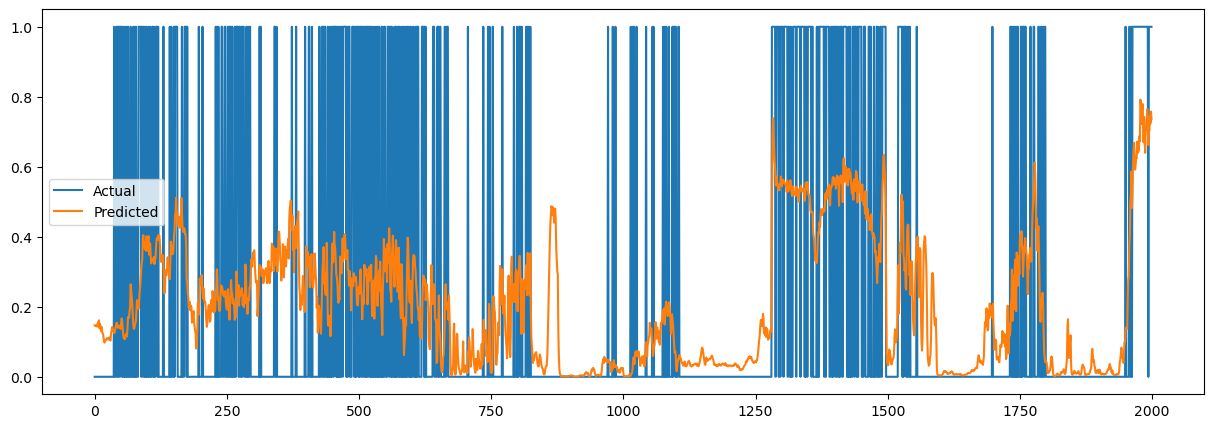

In [37]:
plt.plot(tes[:2000], label = 'Actual')
plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [38]:
print(sum(tes)/len(tes))

[0.25794568]


In [39]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.61172346]
[0.81910625]
total acc [0.78201678]


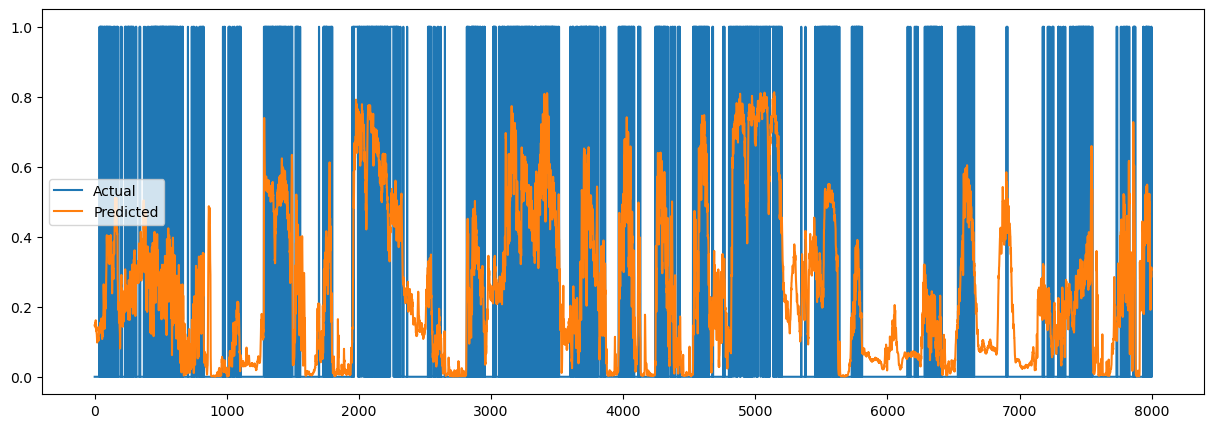

In [40]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

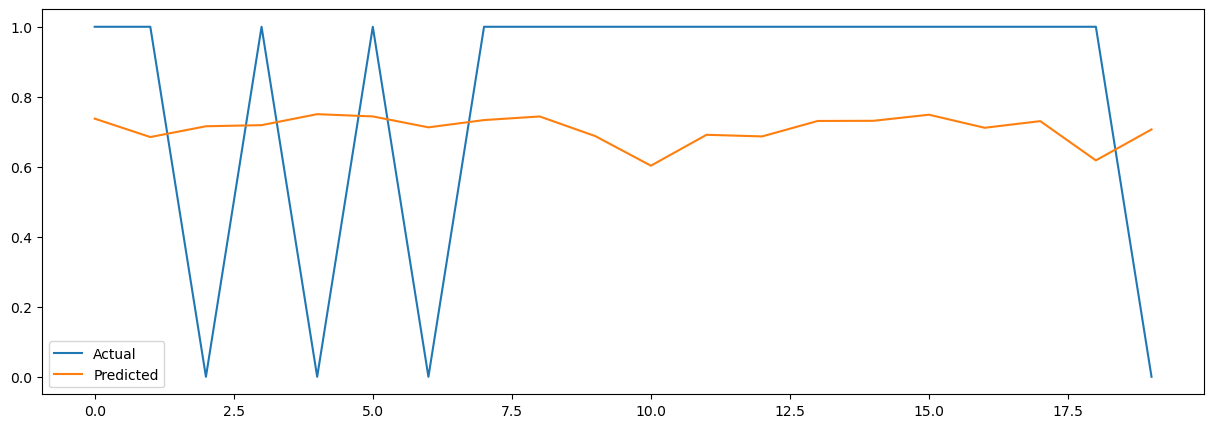

In [41]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

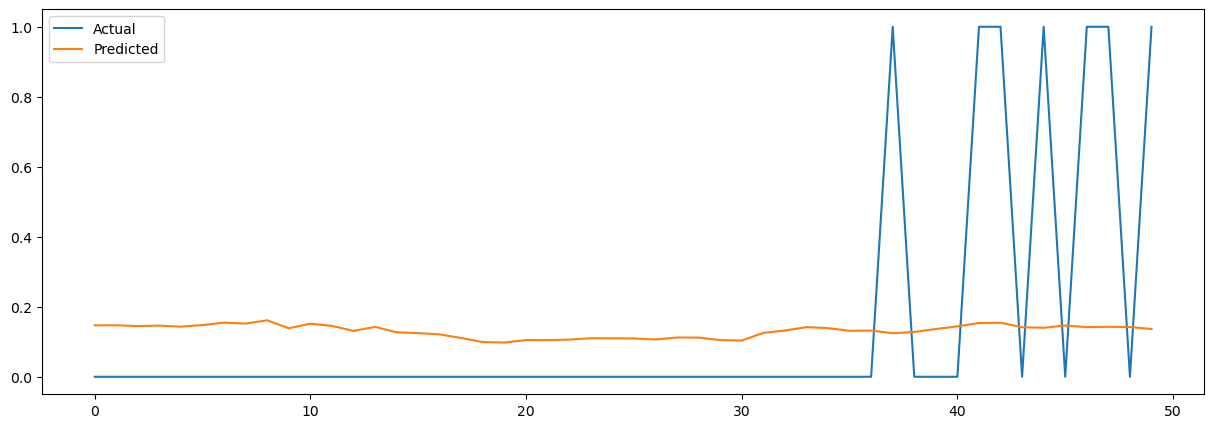

In [42]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

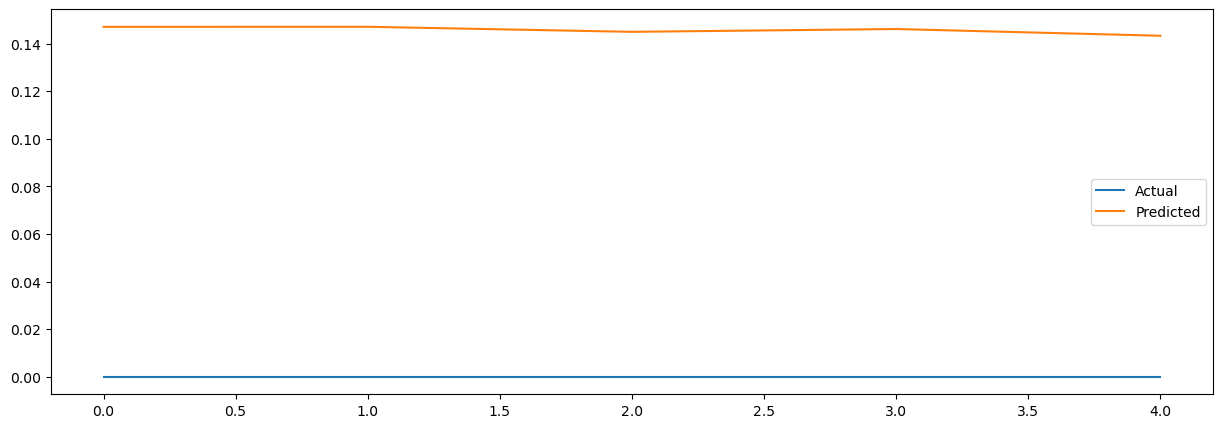

In [43]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()